In [1]:
!pip3 install pyserial
!pip3 install matplotlib
!pip3 install sklearn
!pip3 install tensorflow

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import serial
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
serial_port = '/dev/cu.usbserial-02148B80' # specific port on my Mac
baud_rate = 38400 # baud rate of arduino Serial.print
num_class_samples = 10 # no. of samples to collect
time_per_sample = 2.0 # seconds
accel_sample_rate = 100 # times/sec (Hz)
num_of_accel_samples = int(time_per_sample * accel_sample_rate) # 200

In [5]:
# Manually testing the serial comm w/ Arduino
ser = serial.Serial(serial_port, baud_rate, timeout=1)
time.sleep(2) # wait for port to open
ser.write('r'.encode('ascii')) # sending the Arduino a `r` will command it to read from accelerometer buffers 
line = ser.readline()
ser.close()
print(line)

b'-175\t109\t4094\t\n'


In [6]:
def capture(ser):
    samples = np.zeros((num_of_accel_samples, 3))
    for i in range(num_of_accel_samples):
        start = time.time()
        ser.write('r'.encode('ascii'))
        line = ser.readline()
        parsed = line.decode().rstrip().split('\t') # tab-delimited output
        sample = np.array([float(axis) for axis in parsed]) # cast strings into floats
        samples[i] = sample
        
        while(time.time() - start) < (1. / accel_sample_rate):
            pass
        
    return samples

In [7]:
circle_data = np.zeros((num_class_samples, num_of_accel_samples, 3)) # [10, 200, 3]
ser = serial.Serial(serial_port, baud_rate, timeout=1)
time.sleep(2) # wait for port to open
i = 0
while i < num_class_samples:
    input("Press RETURN and draw a CIRCLE with accelerometer")
    try:
        samples = capture(ser)
        circle_data[i] = np.array(samples)
        print("Sample ", i, "captured with shape: ", circle_data[i].shape)
        i += 1
    except:
        print("Parsing error.")
        pass
ser.close()

Press RETURN and draw a CIRCLE with accelerometer
Sample  0 captured with shape:  (200, 3)
Press RETURN and draw a CIRCLE with accelerometer
Sample  1 captured with shape:  (200, 3)
Press RETURN and draw a CIRCLE with accelerometer
Sample  2 captured with shape:  (200, 3)
Press RETURN and draw a CIRCLE with accelerometer
Sample  3 captured with shape:  (200, 3)
Press RETURN and draw a CIRCLE with accelerometer
Sample  4 captured with shape:  (200, 3)
Press RETURN and draw a CIRCLE with accelerometer
Sample  5 captured with shape:  (200, 3)
Press RETURN and draw a CIRCLE with accelerometer
Sample  6 captured with shape:  (200, 3)
Press RETURN and draw a CIRCLE with accelerometer
Sample  7 captured with shape:  (200, 3)
Press RETURN and draw a CIRCLE with accelerometer
Sample  8 captured with shape:  (200, 3)
Press RETURN and draw a CIRCLE with accelerometer
Sample  9 captured with shape:  (200, 3)


In [8]:
square_data = np.zeros((num_class_samples, num_of_accel_samples, 3)) # [10, 200, 3]
ser = serial.Serial(serial_port, baud_rate, timeout=1)
time.sleep(2) # wait for port to open
i = 0
while i < num_class_samples:
    input("Press RETURN and draw a SQUARE with accelerometer")
    try:
        samples = capture(ser)
        square_data[i] = np.array(samples)
        print("Sample ", i, "captured with shape: ", square_data[i].shape)
        i += 1
    except:
        print("Parsing error.")
        pass
ser.close()

Press RETURN and draw a SQUARE with accelerometer
Sample  0 captured with shape:  (200, 3)
Press RETURN and draw a SQUARE with accelerometer
Sample  1 captured with shape:  (200, 3)
Press RETURN and draw a SQUARE with accelerometer
Sample  2 captured with shape:  (200, 3)
Press RETURN and draw a SQUARE with accelerometer
Sample  3 captured with shape:  (200, 3)
Press RETURN and draw a SQUARE with accelerometer
Sample  4 captured with shape:  (200, 3)
Press RETURN and draw a SQUARE with accelerometer
Sample  5 captured with shape:  (200, 3)
Press RETURN and draw a SQUARE with accelerometer
Sample  6 captured with shape:  (200, 3)
Press RETURN and draw a SQUARE with accelerometer
Sample  7 captured with shape:  (200, 3)
Press RETURN and draw a SQUARE with accelerometer
Sample  8 captured with shape:  (200, 3)
Press RETURN and draw a SQUARE with accelerometer
Sample  9 captured with shape:  (200, 3)


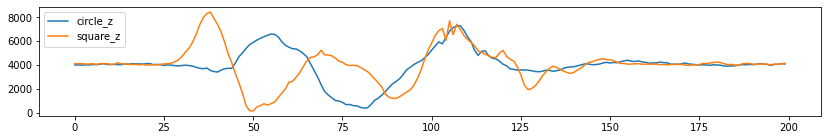

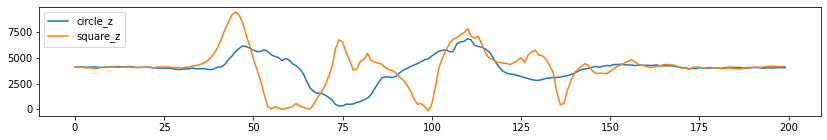

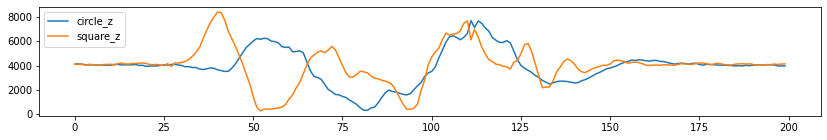

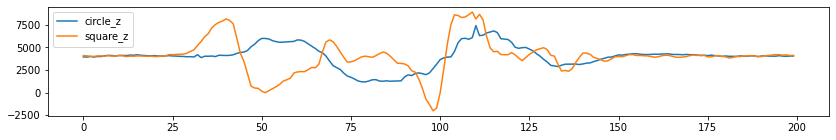

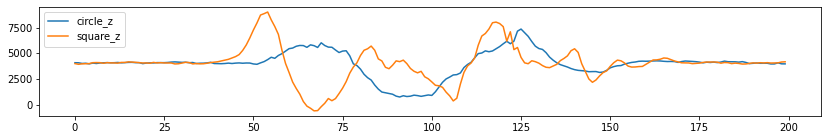

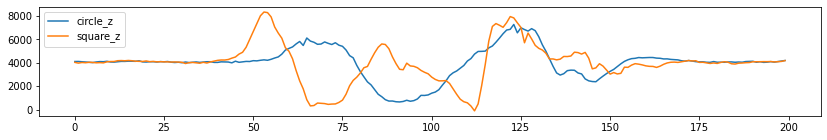

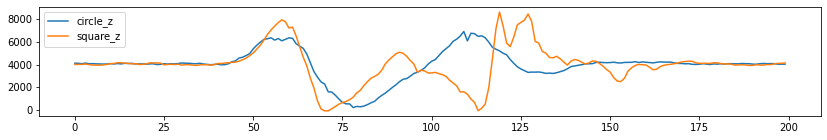

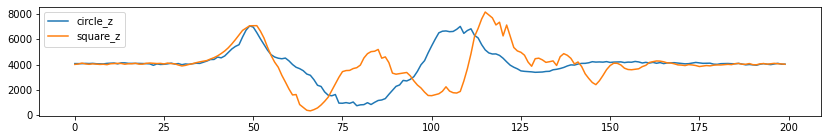

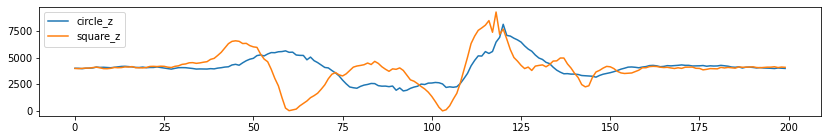

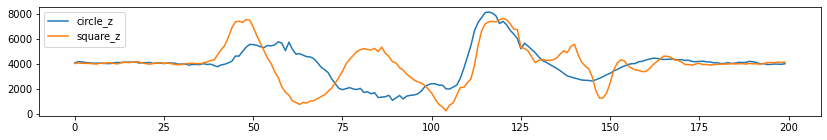

In [9]:
circle_z = circle_data[:,:,2] # only capture the z-axis data
square_z = square_data[:,:,2] # only capture the z-axis data
for sample_idx in range(10):
    fig = plt.figure(figsize=(14,2))
    ax = fig.add_subplot(111)
    ax.plot(circle_z[sample_idx], label='circle_z')
    ax.plot(square_z[sample_idx], label='square_z')
    plt.legend(loc='upper left')
    
plt.show()

## Sklearn MLP

In [10]:
circle_lables = np.repeat('circle', 10) 
square_lables = np.repeat('square', 10)
y = np.append(circle_lables, square_lables)
X = np.append(circle_z, square_z, axis=0)
# In practice, one would ensure we have a training set and validation set
# In prototyping, training on our entire tiny dataset is appropriate
clf = MLPClassifier(
    hidden_layer_sizes=(50,50), 
    max_iter=500, 
    alpha=0.000001, 
    solver='sgd', 
    verbose=1,  
    random_state=42,
    tol=0.0001,
    n_iter_no_change=10,
    learning_rate='constant',
    learning_rate_init=0.000001
)
clf.fit(X, y)

Iteration 1, loss = 16.21964732
Iteration 2, loss = 10.81309983
Iteration 3, loss = 7.20873397
Iteration 4, loss = 6.10201791
Iteration 5, loss = 1.80230757
Iteration 6, loss = 1.80218597
Iteration 7, loss = 0.00000330
Iteration 8, loss = 0.00000330
Iteration 9, loss = 0.00000330
Iteration 10, loss = 0.00000330
Iteration 11, loss = 0.00000330
Iteration 12, loss = 0.00000330
Iteration 13, loss = 0.00000330
Iteration 14, loss = 0.00000330
Iteration 15, loss = 0.00000330
Iteration 16, loss = 0.00000330
Iteration 17, loss = 0.00000330
Iteration 18, loss = 0.00000477
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(alpha=1e-06, hidden_layer_sizes=(50, 50),
              learning_rate_init=1e-06, max_iter=500, random_state=42,
              solver='sgd', verbose=1)

Press RETURN and draw a SQUARE or CIRCLE with accelerometer
Sample captured with shape:  (200,)


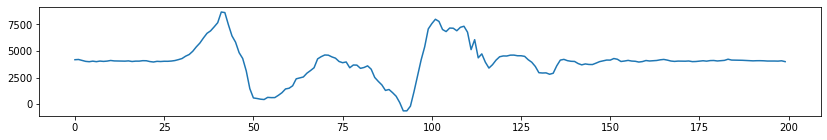

That looks like a square to me!


In [11]:
input_data = None
ser = serial.Serial(serial_port, baud_rate, timeout=1)
time.sleep(2)
input("Press RETURN and draw a SQUARE or CIRCLE with accelerometer")
try:
    sample = capture(ser)
    input_data = np.array(sample[:,2])
    print("Sample captured with shape: ",input_data.shape)
except:
    print("Parsing error.")
    pass
ser.close()

fig = plt.figure(figsize=(14,2))
ax = fig.add_subplot(111)
ax.plot(input_data, label='input_data')
    
plt.show()

print("That looks like a", clf.predict(input_data.reshape(1, -1))[0], "to me!")

## Keras Model

In [12]:
model = Sequential([
    Dense(50, activation='relu', input_shape=(200,)),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

2021-08-23 08:54:28.766832: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.fit(
    X,
    to_categorical(np.append(np.repeat(0, 10), np.repeat(1, 10))),
    epochs=10,
    batch_size=5
)

2021-08-23 08:54:42.913726: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
4/4 [==============================] - 0s 1ms/step - loss: 1309.4854 - accuracy: 0.4000
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 461.0706 - accuracy: 0.6500
Epoch 3/10
4/4 [==============================] - 0s 1ms/step - loss: 180.2247 - accuracy: 0.7000
Epoch 4/10
4/4 [==============================] - 0s 1ms/step - loss: 81.1924 - accuracy: 0.9500
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 44.5821 - accuracy: 0.9500
Epoch 6/10
4/4 [==============================] - 0s 1ms/step - loss: 31.8611 - accuracy: 0.9000
Epoch 7/10
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 1ms/step - loss: 5.0879e-27 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 1ms/step - loss: 1.1063 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 1.6464e-21 - accuracy: 1.0000


In [14]:
model.save_weights('model.2b')

Press RETURN and draw a SQUARE or CIRCLE with accelerometer
Sample captured with shape:  (200,)


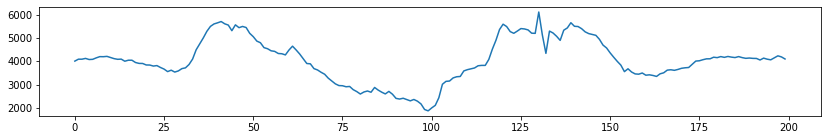

array([[0., 1.]], dtype=float32)

In [24]:
input_data = None
ser = serial.Serial(serial_port, baud_rate, timeout=1)
time.sleep(2)
input("Press RETURN and draw a SQUARE or CIRCLE with accelerometer")
try:
    sample = capture(ser)
    input_data = np.array(sample[:,2])
    print("Sample captured with shape: ",input_data.shape)
except:
    print("Parsing error.")
    pass
ser.close()

fig = plt.figure(figsize=(14,2))
ax = fig.add_subplot(111)
ax.plot(input_data, label='input_data')
    
plt.show()

model.predict(input_data.reshape(1, -1))

Press RETURN and draw a SQUARE or CIRCLE with accelerometer
Sample captured with shape:  (200,)


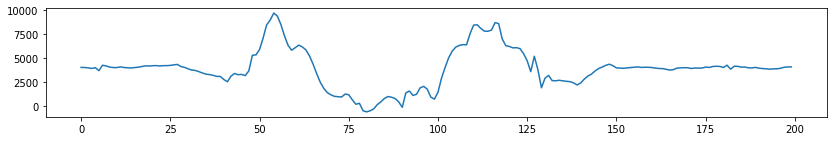

Keras model: circle
Sklearn model: circle


In [28]:
input_data = None
ser = serial.Serial(serial_port, baud_rate, timeout=1)
time.sleep(2)
input("Press RETURN and draw a SQUARE or CIRCLE with accelerometer")
try:
    sample = capture(ser)
    input_data = np.array(sample[:,2])
    print("Sample captured with shape: ",input_data.shape)
except:
    print("Parsing error.")
    pass
ser.close()

fig = plt.figure(figsize=(14,2))
ax = fig.add_subplot(111)
ax.plot(input_data, label='input_data')
    
plt.show()

sklearn_prediction = clf.predict(input_data.reshape(1, -1))[0]
keras_prediction = 'circle' if model.predict(input_data.reshape(1, -1))[0][1] == 0. else 'square'
print("Keras model:", keras_prediction)
print("Sklearn model:", sklearn_prediction)